In [4]:
import pandas as pd

# Convert to DataFrame
df = pd.read_csv('RoomMatesDataSet.csv')
 
# Visual Representation of DataFrame
df

,ID,Name,Age,Gender,Native Language,Interests,Cleanliness Level,Sleeping Level,Smoking,Drinking,Cooking Level,Introvert Level,Extrovert Level,Intrest In Music,Intrest In Dance,Intrest In Physical Activities,Exercise Habits,Intrest in Gaming,IsWorking
0,1,Jatin Nair,20,Female,English,Music,5,1,0,1,1,5,4,4,2,3,1,5,1
1,2,Xena Pandey,35,Male,Spanish,Sports,3,5,1,0,5,5,2,3,1,4,5,2,1
2,3,Deepak Yadav,16,Male,Hindi,Cooking,4,5,1,0,5,1,5,2,2,1,5,4,1
3,4,Aakash Chopra,35,Female,Spanish,Cooking,5,1,1,0,1,1,1,1,3,5,5,4,0
4,5,Tina Gupta,34,Male,English,Traveling,2,5,0,0,3,2,2,3,2,3,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,Hari,49,Female,Russian,Music,5,5,0,1,4,3,2,1,5,3,5,2,1
496,497,Bittu,22,Female,German,Nature,5,4,0,1,5,3,3,5,5,3,1,3,0
497,498,Tina,17,Male,Hindi,Music,2,3,0,0,3,4,4,5,4,1,2,5,0
498,499,Manoj,36,Male,German,Nature,3,1,0,1,3,2,5,1,3,3,5,3,0


# Test Dataset 

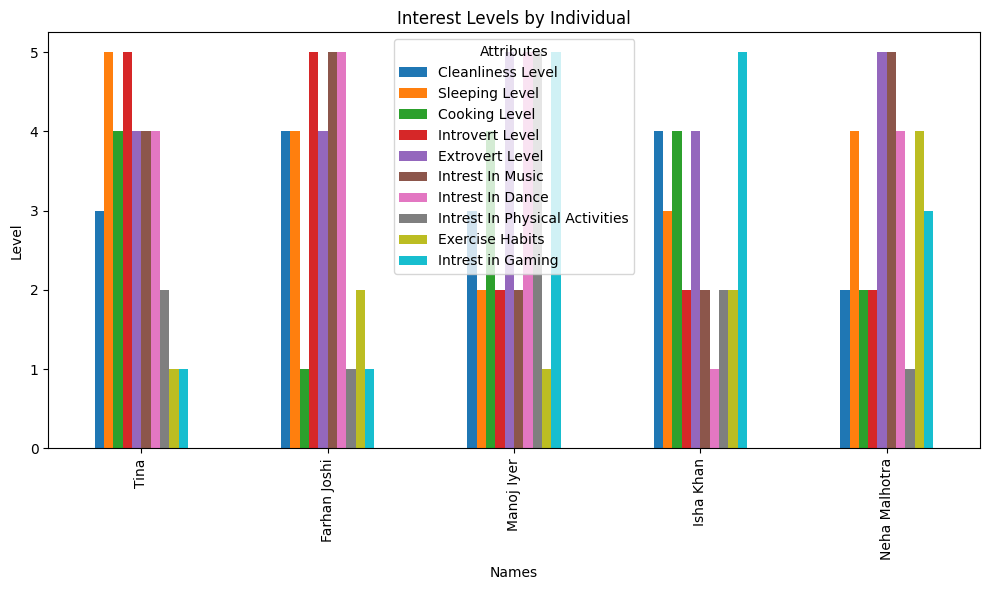

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


attributes = [
    "Cleanliness Level", "Sleeping Level", "Cooking Level",
    "Introvert Level", "Extrovert Level", "Intrest In Music",
    "Intrest In Dance", "Intrest In Physical Activities",
    "Exercise Habits", "Intrest in Gaming"
]

# Create a bar plot for each individual
fig, ax = plt.subplots(figsize=(10, 6))
df.sample(n=5).set_index('Name')[attributes].plot(kind='bar', ax=ax)
plt.title('Interest Levels by Individual')
plt.ylabel('Level')
plt.xlabel('Names')
plt.xticks(rotation=90)
plt.legend(title='Attributes')
plt.tight_layout()
plt.show()

In [6]:
# Define preprocessing steps
categorical_features = ['Gender',
                        'Native Language',
                        'Interests']
numeric_features = ['Cleanliness Level',
                    'Sleeping Level',
                    'Smoking',
                    'Drinking',
                    'Cooking Level',
                    'Introvert Level',
                    'Extrovert Level',
                    'Intrest In Music',
                    'Intrest In Dance',
                    'Intrest In Physical Activities',
                    'Exercise Habits',
                    'Intrest in Gaming',
                    'IsWorking'
                   ]


In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

# ('num', StandardScaler(), numeric_features): 
# This transformer is for numeric features. The StandardScaler standardizes these features by removing the mean and scaling to unit variance.
# ('cat', OneHotEncoder(), categorical_features): 
# This transformer is for categorical features. The OneHotEncoder converts categorical variables into a format that can be provided to ML algorithms, typically creating binary columns for each category.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

In [8]:
from sklearn.pipeline import make_pipeline, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

X = preprocessor.fit_transform(df)


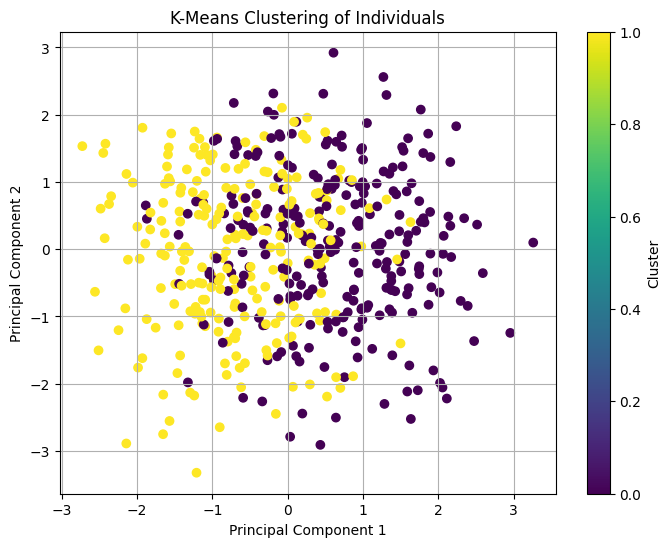

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the number of clusters (e.g., 2 for simplicity)
num_clusters = 2

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters (if you reduce dimensions)
# For visualization, you might want to use PCA to reduce dimensions
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering of Individuals')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid()

# Show plot
plt.show()


In [10]:

from sklearn.pipeline import Pipeline
# Create pipeline for KMeans clustering
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=20, random_state=42))  # Adjust the number of clusters as needed
])

# Fit the model
pipeline.fit(df)

# Get cluster labels
df['Cluster'] = pipeline.predict(df)

print(df[['Name', 'Cluster']])


              Name  Cluster
0       Jatin Nair        7
1      Xena Pandey        4
2     Deepak Yadav        3
3    Aakash Chopra       12
4       Tina Gupta        6
..             ...      ...
495           Hari       19
496          Bittu        2
497           Tina        7
498          Manoj        0
499          Leena       18

[500 rows x 2 columns]


# Cosine Similarity Matrix:

In [11]:

X = preprocessor.fit_transform(df)
from sklearn.metrics.pairwise import cosine_similarity

# Compute pairwise similarity
similarity_matrix = cosine_similarity(X)

# Convert similarity to percentage
match_percentages = similarity_matrix * 100

# Create a DataFrame for easy viewing
match_percentages_df = pd.DataFrame(match_percentages, index=df['Name'], columns=df['Name'])
print(match_percentages_df)


Name           Jatin Nair  Xena Pandey  Deepak Yadav  Aakash Chopra   
Name                                                                  
Jatin Nair     100.000000   -32.856231    -32.093846      -3.791034  \
Xena Pandey    -32.856231   100.000000     33.679924      -3.408653   
Deepak Yadav   -32.093846    33.679924    100.000000      -0.076370   
Aakash Chopra   -3.791034    -3.408653     -0.076370     100.000000   
Tina Gupta     -48.846669    34.065988     16.502264       5.529662   
...                   ...          ...           ...            ...   
Hari            -9.633890    16.225161     17.813391       7.242917   
Bittu           16.706773   -24.564554    -17.508561     -26.946497   
Tina            23.997597   -23.246870      5.167827     -33.373422   
Manoj            2.011533   -25.728652     11.839623      22.977109   
Leena          -17.244605    19.848218     53.343958      13.312356   

Name           Tina Gupta  Manoj Kapoor  Tina Verma  Esha Dutta   
Name     

## User Preferences Data Collection

In [1]:
# Function to collect user preferences
def collect_preferences():
    new_preference = {
        "Name": input("Enter your name: "),
        "Gender": input("Enter your gender: "),
        "Native Language": input("Enter your native language: "),
        "Interests": input("Enter your interests: "),
        "Cleanliness Level (1-5)": int(input("Rate your cleanliness level (1-5): ")),
        "Sleeping Level (1-5)": int(input("Rate your sleeping level (1-5): ")),
        "Smoking (0: No, 1: Yes)": int(input("Do you smoke? (0 for No, 1 for Yes): ")),
        "Drinking (0: No, 1: Yes)": int(input("Do you drink alcohol? (0 for No, 1 for Yes): ")),
        "Cooking Level (1-5)": int(input("Rate your cooking level (1-5): ")),
        "Introvert Level (1-5)": int(input("Rate your introvert level (1-5): ")),
        "Extrovert Level (1-5)": int(input("Rate your extrovert level (1-5): ")),
        "Interest In Music (1-5)": int(input("Rate your interest in music (1-5): ")),
        "Interest In Dance (1-5)": int(input("Rate your interest in dance (1-5): ")),
        "Interest In Physical Activities (1-5)": int(input("Rate your interest in physical activities (1-5): ")),
        "Exercise Habits (1-5)": int(input("Rate your exercise habits (1-5): ")),
        "Interest in Gaming (1-5)": int(input("Rate your interest in gaming (1-5): ")),
        "Is Working (0: No, 1: Yes)": int(input("Are you currently working? (0 for No, 1 for Yes): "))
    }
    
    return new_preference

# Collect preferences from the user
user_preferences = collect_preferences()

# Print the collected preferences
print("\nCollected Preferences:")
for key, value in user_preferences.items():
    print(f"{key}: {value}")


Enter your name: Steve Rogers
Enter your gender: Male
Enter your native language: English
Enter your interests: Patriotism, Sketching
Rate your cleanliness level (1-5): 5
Rate your sleeping level (1-5): 5
Do you smoke? (0 for No, 1 for Yes): 5
Do you drink alcohol? (0 for No, 1 for Yes): 2
Rate your cooking level (1-5): 0
Rate your introvert level (1-5): 5
Rate your extrovert level (1-5): 5
Rate your interest in music (1-5): 5
Rate your interest in dance (1-5): 5
Rate your interest in physical activities (1-5): 5
Rate your exercise habits (1-5): 5
Rate your interest in gaming (1-5): 5
Are you currently working? (0 for No, 1 for Yes): 0

Collected Preferences:
Name: Steve Rogers
Gender: Male
Native Language: English
Interests: Patriotism, Sketching
Cleanliness Level (1-5): 5
Sleeping Level (1-5): 5
Smoking (0: No, 1: Yes): 5
Drinking (0: No, 1: Yes): 2
Cooking Level (1-5): 0
Introvert Level (1-5): 5
Extrovert Level (1-5): 5
Interest In Music (1-5): 5
Interest In Dance (1-5): 5
Interest 

## Predicting Maching Profiles

In [16]:
# New preference object
new_preference = {
    "Name": "Blair",
    "Gender": "Female",
    "Native Language": "Spanish",
    "Interests": "Reading",
    "Cleanliness Level": 3,
    "Sleeping Level": 5,
    "Smoking": 0,
    "Drinking": 0,
    "Cooking Level": 4,
    "Introvert Level": 3,
    "Extrovert Level": 2,
    "Intrest In Music": 2,
    "Intrest In Dance": 3,
    "Intrest In Physical Activities": 5,
    "Exercise Habits": 3,
    "Intrest in Gaming": 1,
    "IsWorking": 1
  }

# Convert new preference to DataFrame
new_preference_df = pd.DataFrame([new_preference])

# Apply preprocessing
new_preference_processed = preprocessor.transform(new_preference_df)

# Predict cluster for new preference
predicted_cluster = kmeans.predict(new_preference_processed)[0]

# Find users in the same cluster
matching_users = df[df['Cluster'] == predicted_cluster]
print("Matching users:")
matching_users[["Name"]]


Matching users:


,Name
56,Hari Kapoor
58,Qasim Patel
75,Isha Khan
77,Yash Patel
144,Neha Nair
187,Chitra Chopra
221,Leena Ahmad
301,Jatin
306,Bittu
324,Gita


In [17]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_individual_match_percentage(new_preference, df, preprocessor):
    # Preprocess new preference object
    new_preference_df = pd.DataFrame([new_preference])
    new_preference_processed = preprocessor.transform(new_preference_df)
    
    # Preprocess existing user profiles
    existing_profiles_processed = preprocessor.transform(df)
    
    # Calculate similarity
    similarities = cosine_similarity(new_preference_processed, existing_profiles_processed)
    
    # Convert similarity to percentage
    match_percentages = similarities[0] * 100
    
    # Create a DataFrame with match percentages
    result = pd.DataFrame({
        'Name': df['Name'],
        'Match Percentage': match_percentages
    })
    
    return result

# New preference object
new_preference = {
    "ID": 3,
    "Name": "Deepak Yadav",
    "Age": 16,
    "Gender": "Male",
    "Native Language": "Hindi",
    "Interests": "Cooking",
    "Cleanliness Level": 4,
    "Sleeping Level": 5,
    "Smoking": 1,
    "Drinking": 0,
    "Cooking Level": 5,
    "Introvert Level": 1,
    "Extrovert Level": 5,
    "Intrest In Music": 2,
    "Intrest In Dance": 2,
    "Intrest In Physical Activities": 1,
    "Exercise Habits": 5,
    "Intrest in Gaming": 4,
    "IsWorking": 1
  }

# Calculate and print match percentages
match_percentages_df = calculate_individual_match_percentage(new_preference, df, preprocessor)
match_percentages_df


,Name,Match Percentage
0,Jatin Nair,-32.093846
1,Xena Pandey,33.679924
2,Deepak Yadav,100.000000
3,Aakash Chopra,-0.076370
4,Tina Gupta,16.502264
...,...,...
495,Hari,17.813391
496,Bittu,-17.508561
497,Tina,5.167827
498,Manoj,11.839623


In [22]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

def highlight_scores(s):
    return [
     'background-color: green' if v > 60 else
        'background-color: lightblue' if 20 <= v <= 60 else
        'background-color: red' if v < 20 else
        ''
        for v in s
    ]

sorted_df = match_percentages_df.sort_values(by='Match Percentage', ascending=False)
sorted_df['Percentage'] = sorted_df['Match Percentage'].astype(str) + '%'

styled_df = sorted_df.style.apply(highlight_scores, subset=['Match Percentage'])
styled_df


,Name,Match Percentage,Percentage
2,Deepak Yadav,100.000000,99.99999999999997%
229,Isha Khan,72.273776,72.27377635715835%
269,Chitra,70.351416,70.35141580699674%
377,Esha,68.104953,68.10495286282917%
275,Kiran,67.164353,67.16435336366938%
484,Xena,66.337062,66.33706234145413%
133,Bittu Dutta,64.724290,64.72429035071401%
421,Vikram,63.123696,63.12369626928651%
450,Ravi,60.321921,60.32192105220033%
317,Chitra,59.587450,59.58744967203064%


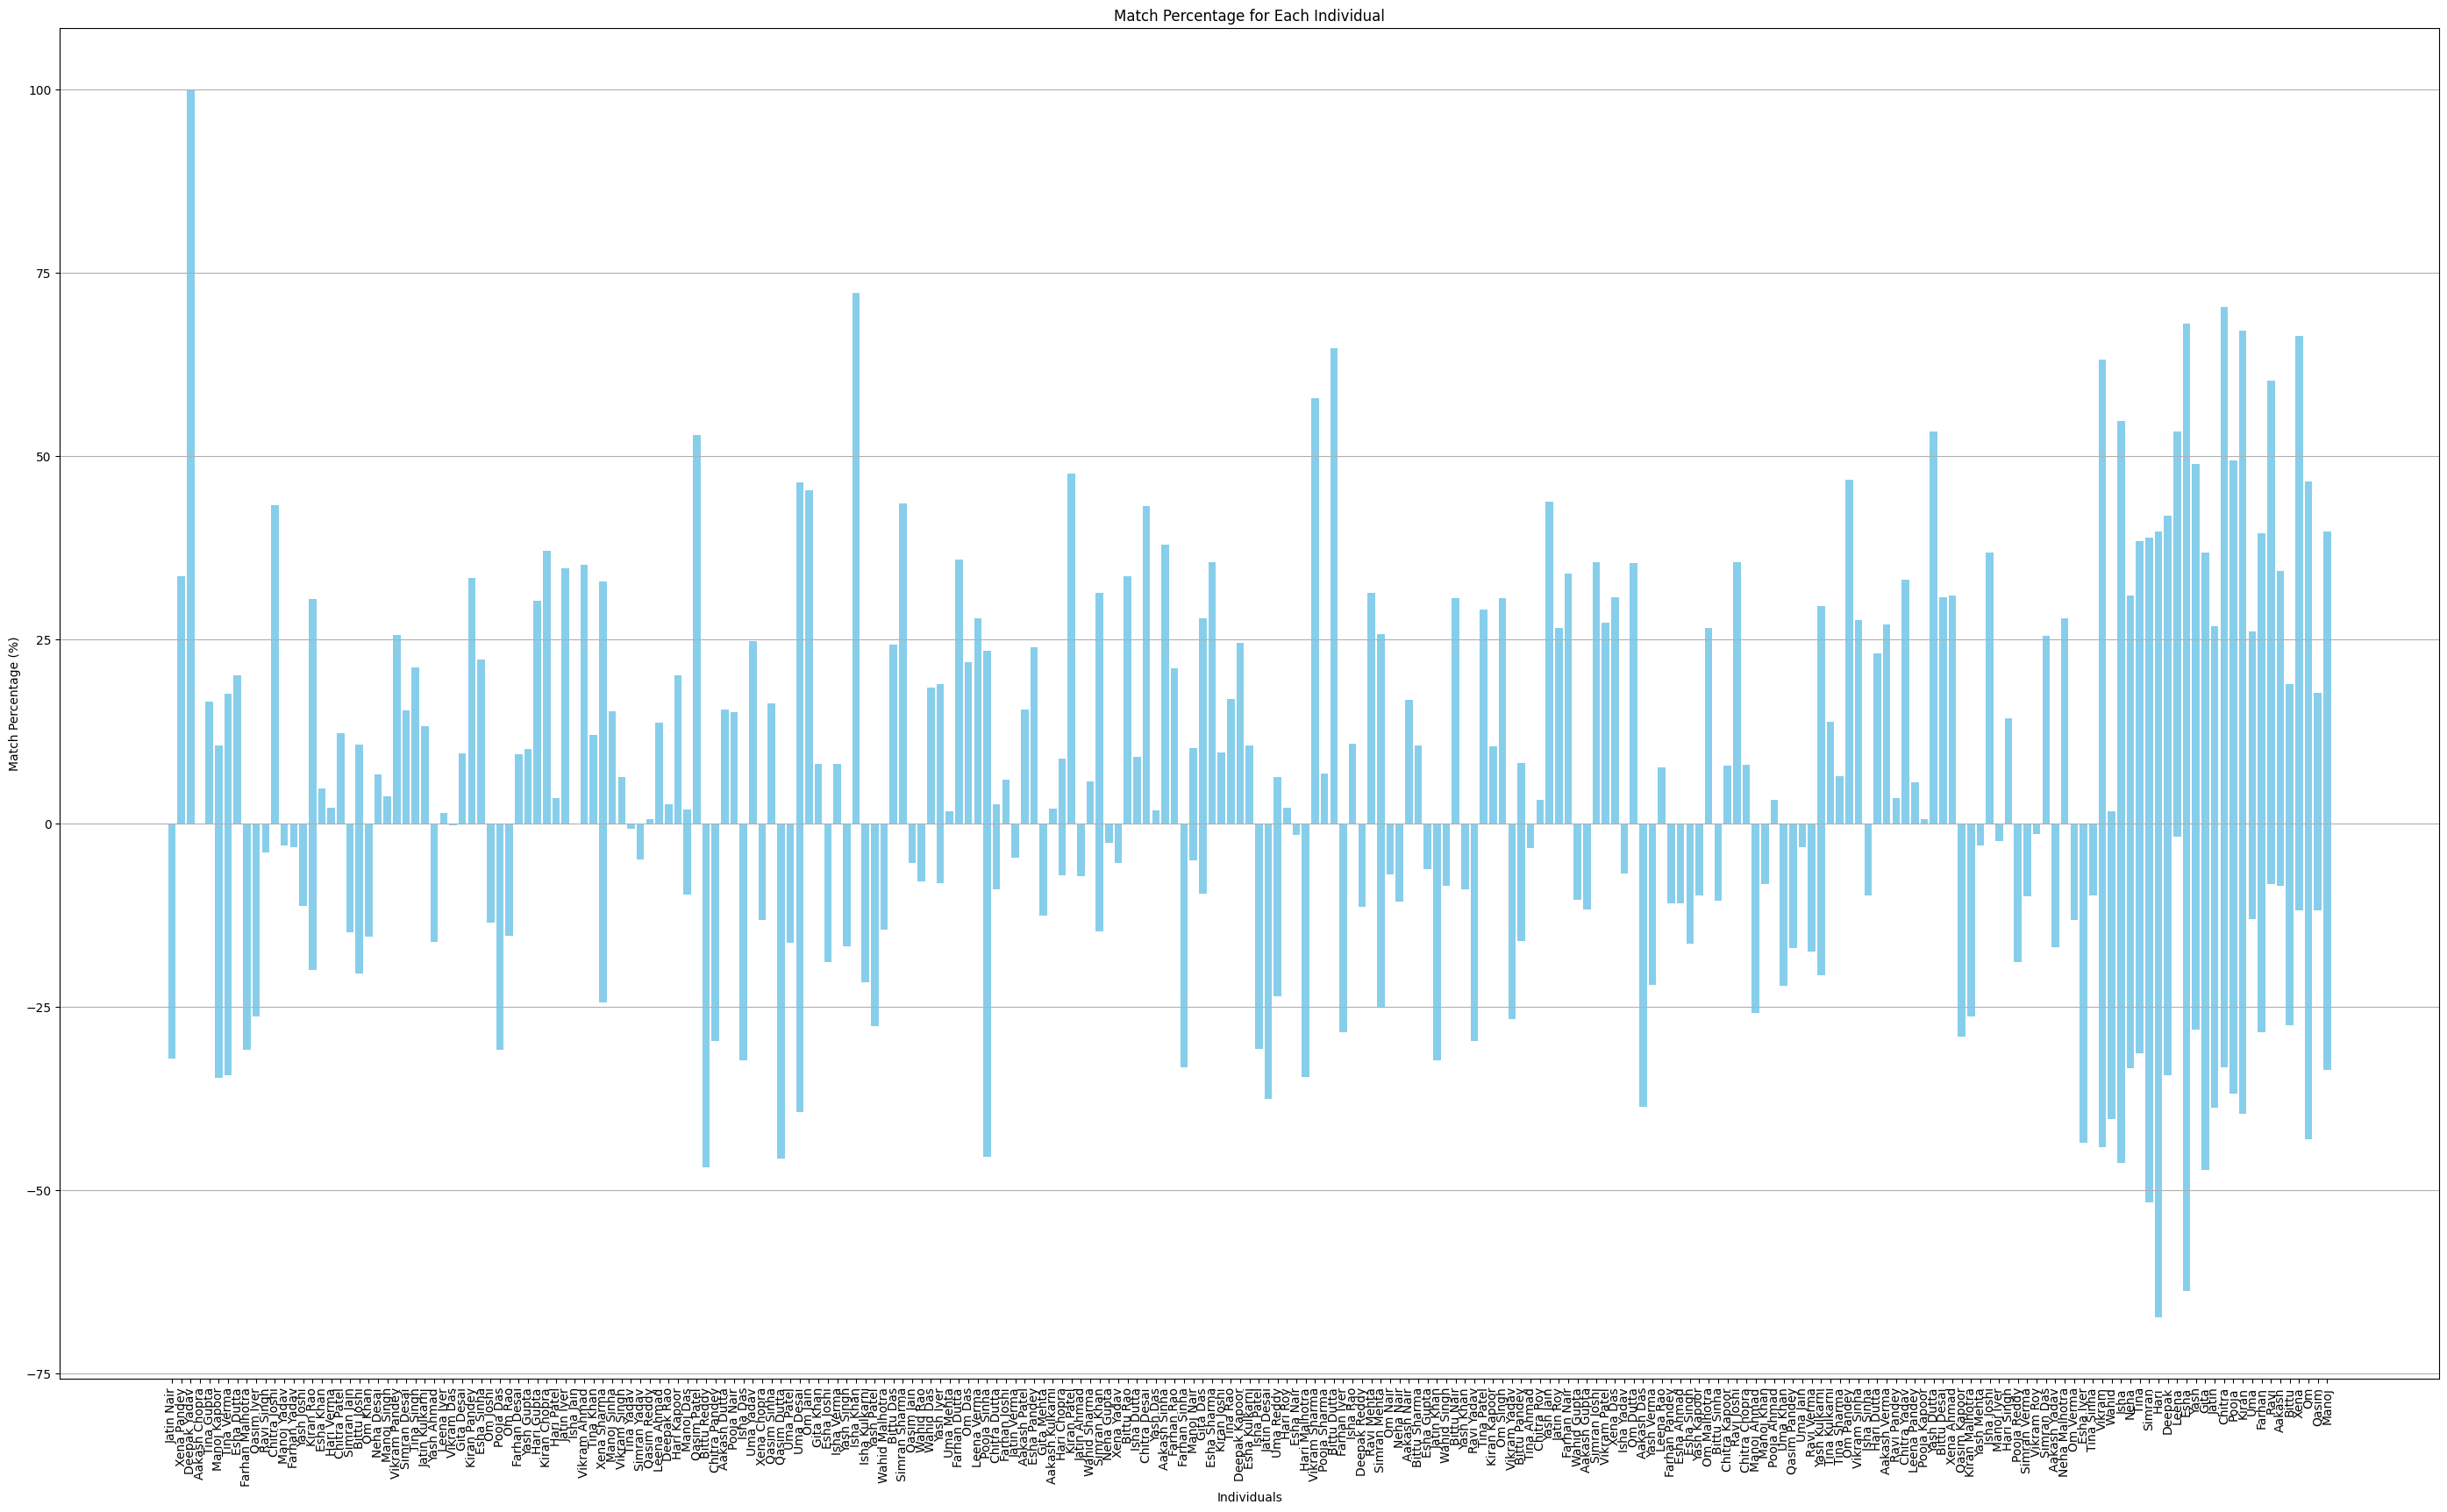

In [20]:
import matplotlib.pyplot as plt

# Bar chart for match percentages
plt.figure(figsize=(35, 20))
plt.bar(match_percentages_df['Name'], match_percentages_df['Match Percentage'], color='skyblue')
plt.title('Match Percentage for Each Individual')
plt.xlabel('Individuals')
plt.ylabel('Match Percentage (%)')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Show plot
plt.show()


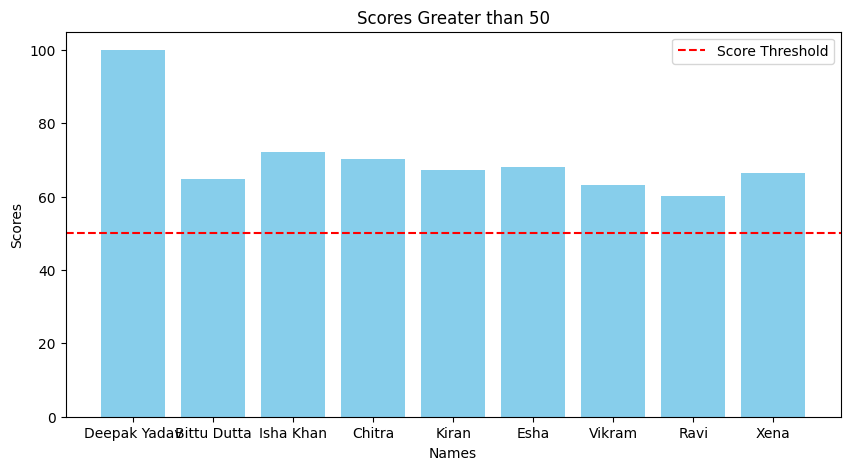

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Filter the DataFrame
filtered_df = match_percentages_df[match_percentages_df['Match Percentage'] > 60]

# Plot using Matplotlib
plt.figure(figsize=(10, 5))
plt.bar(filtered_df['Name'], filtered_df['Match Percentage'], color='skyblue')
plt.title('Scores Greater than 50')
plt.xlabel('Names')
plt.ylabel('Scores')
plt.axhline(50, color='red', linestyle='--', label='Score Threshold')
plt.legend()
plt.show()

# Alternatively, use Seaborn
# plt.figure(figsize=(10, 5))
# sns.barplot(x='name', y='score', data=filtered_df, palette='Blues')
# plt.title('Scores Greater than 50')
# plt.axhline(50, color='red', linestyle='--', label='Score Threshold')
# plt.legend()
# plt.show()
